%%bash
pip install -r requirements.txt

In [1]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [2]:
import gym
env = gym.make("MountainCar-v0")

#プロット関連のimport
import matplotlib.pyplot as plt
from matplotlib import animation, rc

#vcopt関連のimport
import numpy as np
import numpy.random as nr
from vcopt import vcopt

## ここまで初期設定

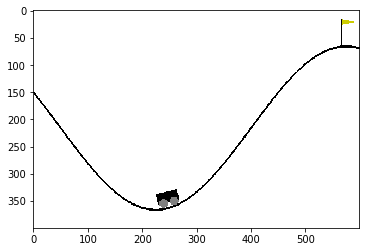

In [3]:
#ゲーム環境のリセット
observation = env.reset()

#画像の準備
fig = plt.figure()
ims = []

#繰り返し操作して画面を表示
for i in range(200):
    action = nr.randint(0, 2)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [4]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

## ここから動く

In [5]:
def get_status(_observation):
    env_low = env.observation_space.low # 位置と速度の最小値
    env_high = env.observation_space.high # 位置と速度の最大値
    env_dx = (env_high - env_low) / 40 # 40等分
    # 0〜39の離散値に変換する
    position = int((_observation[0] - env_low[0])/env_dx[0])
    velocity = int((_observation[1] - env_low[1])/env_dx[1])
    return position, velocity

In [6]:
q_table = np.zeros((40, 40, 3))

In [7]:
def update_q_table(_q_table, _action,  _observation, _next_observation, _reward, _episode):

    alpha = 0.2 # 学習率
    gamma = 0.99 # 時間割引き率

    # 行動後の状態で得られる最大行動価値 Q(s',a')
    next_position, next_velocity = get_status(_next_observation)
    next_max_q_value = max(_q_table[next_position][next_velocity])

    # 行動前の状態の行動価値 Q(s,a)
    position, velocity = get_status(_observation)
    q_value = _q_table[position][velocity][_action]

    # 行動価値関数の更新
    _q_table[position][velocity][_action] = q_value + alpha * (_reward + gamma * next_max_q_value - q_value)

    return _q_table

In [8]:
def get_action(_env, _q_table, _observation, _episode):
    epsilon = 0.002
    if np.random.uniform(0, 1) > epsilon:
        position, velocity = get_status(observation)
        _action = np.argmax(_q_table[position][velocity])
    else:
        _action = np.random.choice([0, 1, 2])
    return _action

In [9]:
if __name__ == '__main__':

    env = gym.make('MountainCar-v0')

    # Qテーブルの初期化
    q_table = np.zeros((40, 40, 3))

    observation = env.reset()
    rewards = []

    # 10000エピソードで学習する
    for episode in range(90000):

        total_reward = 0
        observation = env.reset()

        for _ in range(200):

            # ε-グリーディ法で行動を選択
            action = get_action(env, q_table, observation, episode)

            # 車を動かし、観測結果・報酬・ゲーム終了FLG・詳細情報を取得
            next_observation, reward, done, _ = env.step(action)

            # Qテーブルの更新
            q_table = update_q_table(q_table, action, observation, next_observation, reward, episode)
            total_reward += reward

            observation = next_observation

            if done:
                # doneがTrueになったら１エピソード終了
                if episode%100 == 0:
                    print('episode: {}, total_reward: {}'.format(episode, total_reward))
                rewards.append(total_reward)
                break

episode: 0, total_reward: -200.0
episode: 100, total_reward: -200.0
episode: 200, total_reward: -200.0
episode: 300, total_reward: -200.0
episode: 400, total_reward: -200.0
episode: 500, total_reward: -200.0
episode: 600, total_reward: -200.0
episode: 700, total_reward: -200.0
episode: 800, total_reward: -200.0
episode: 900, total_reward: -200.0
episode: 1000, total_reward: -200.0
episode: 1100, total_reward: -200.0
episode: 1200, total_reward: -200.0
episode: 1300, total_reward: -200.0
episode: 1400, total_reward: -200.0
episode: 1500, total_reward: -200.0
episode: 1600, total_reward: -200.0
episode: 1700, total_reward: -200.0
episode: 1800, total_reward: -200.0
episode: 1900, total_reward: -200.0
episode: 2000, total_reward: -159.0
episode: 2100, total_reward: -200.0
episode: 2200, total_reward: -200.0
episode: 2300, total_reward: -153.0
episode: 2400, total_reward: -200.0
episode: 2500, total_reward: -200.0
episode: 2600, total_reward: -200.0
episode: 2700, total_reward: -174.0
epis

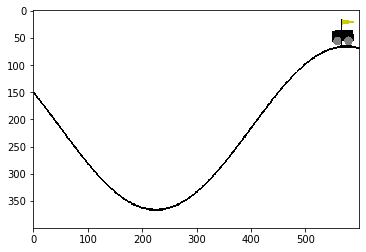

In [10]:
observation = env.reset()
fig = plt.figure()
ims = []

for _ in range(200):

    # ε-グリーディ法で行動を選択
    action = get_action(env, q_table, observation, episode)

    # 車を動かし、観測結果・報酬・ゲーム終了FLG・詳細情報を取得
    next_observation, reward, done, _ = env.step(action)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    # Qテーブルの更新
    q_table = update_q_table(q_table, action, observation, next_observation, reward, episode)
    total_reward += reward

    observation = next_observation

    if done:
        # doneがTrueになったら１エピソード終了
        if episode%100 == 0:
            print('episode: {}, total_reward: {}'.format(episode, total_reward))
        rewards.append(total_reward)
        break

In [11]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [12]:
ani.save("file1.mp4")